In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
df = pd.read_csv("data/Indicadores_CEINS.csv")
ocupacion = df.loc[df['fecha'] >= '2013-01-01']
ocupacion['fecha'].min(), ocupacion['fecha'].max()
ocupacion.head()

,Hotel,fecha,occ,habs_disp,tp,po,pt,te
0,CEINS,2013-01-01,0.194969,159,1100.34,0.930938,1.15998,214.531
1,CEINS,2013-01-02,0.245283,159,1045.75,0.921469,1.12549,256.506
2,CEINS,2013-01-03,0.283019,159,1022.09,0.980766,1.03368,289.270
3,CEINS,2013-01-04,0.251572,159,1017.40,0.947943,1.10197,255.950
4,CEINS,2013-01-05,0.270440,159,1027.94,1.158630,1.10918,277.996


In [3]:
cols = ['Hotel','habs_disp','tp','po','pt','te']
ocupacion = ocupacion.drop(cols, axis=1)
ocupacion = ocupacion.sort_values('fecha')
ocupacion.isnull().sum()
ocupacion.head()

,fecha,occ
0,2013-01-01,0.194969
1,2013-01-02,0.245283
2,2013-01-03,0.283019
3,2013-01-04,0.251572
4,2013-01-05,0.270440


In [4]:
ocupacion = ocupacion.groupby('fecha')['occ'].sum().reset_index()

In [5]:
ocupacion['fecha']=pd.to_datetime(ocupacion['fecha'])
ocupacion = ocupacion.set_index('fecha')
ocupacion.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13'],
              dtype='datetime64[ns]', name='fecha', length=2051, freq=None)

In [6]:
y = ocupacion

In [7]:
y['2017':]

,occ
fecha,
2017-01-01,0.220126
2017-01-02,0.207547
2017-01-03,0.264151
2017-01-04,0.377358
2017-01-05,0.314465
2017-01-06,0.201258
2017-01-07,0.251572
2017-01-08,0.339623
2017-01-09,0.622642


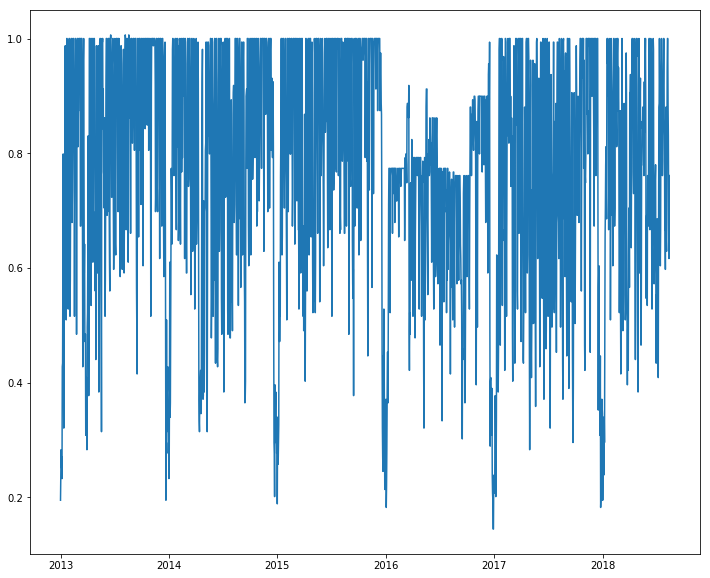

In [8]:
plt.plot(y['occ'])
plt.savefig('figures/TsOcc.png', dpi=100)
plt.show()

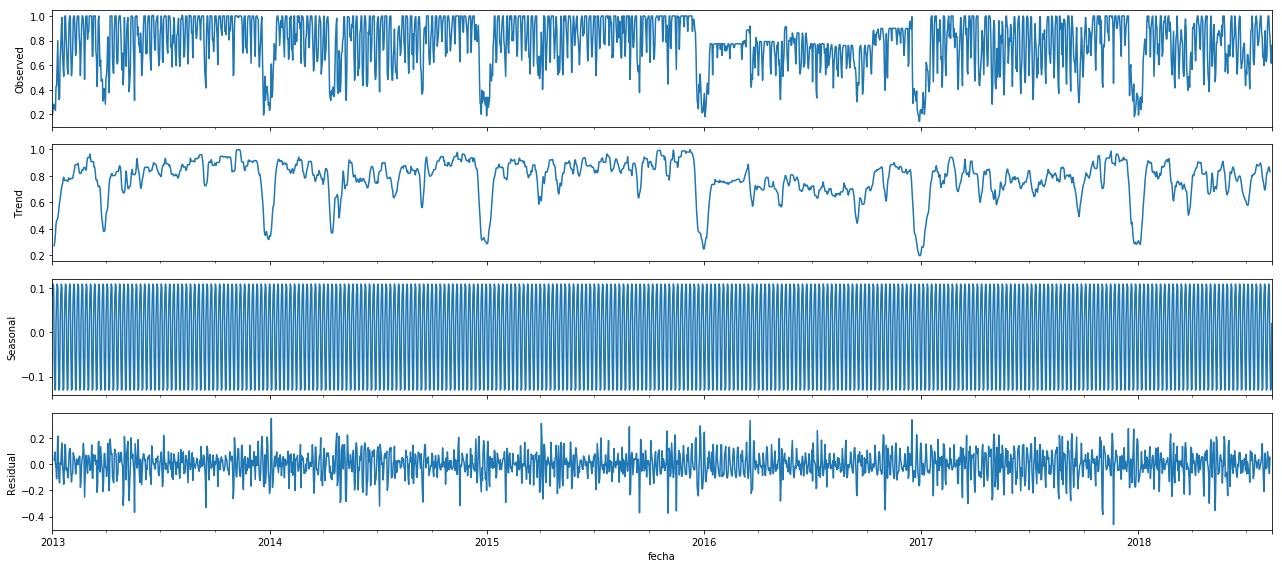

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.savefig('figures/Decomp.png', dpi=100)
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 60)
SARIMAX: (0, 0, 1) x (0, 1, 0, 60)
SARIMAX: (0, 1, 0) x (0, 1, 1, 60)
SARIMAX: (0, 1, 0) x (1, 0, 0, 60)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}60 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 60)60 - AIC:4932.750118479033
ARIMA(0, 0, 0)x(0, 0, 1, 60)60 - AIC:3450.6573594876177


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 60)60 - AIC:1115.9332930409423


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 60)60 - AIC:-499.509396284362


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 60)60 - AIC:1042.8129423064088


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 60)60 - AIC:-443.0380024483902


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 60)60 - AIC:-32.79669141733678


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 60)60 - AIC:-575.5694916033797
ARIMA(0, 0, 1)x(0, 0, 0, 60)60 - AIC:2524.395656547878

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 1)x(0, 0, 1, 60)60 - AIC:1418.0902488160837


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 60)60 - AIC:-181.0822041215749


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 60)60 - AIC:-1651.205764336108


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 60)60 - AIC:-291.5584059853628


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 60)60 - AIC:-1644.3832754515456


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 60)60 - AIC:-1079.3195710690334


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 60)60 - AIC:-1671.4959396819481


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 0, 60)60 - AIC:-1923.6718367359372


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 60)60 - AIC:-1994.177460433636


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 60)60 - AIC:-19.5496536059874


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 60)60 - AIC:-1648.483219892535


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 60)60 - AIC:-2020.0081656147906


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 60)60 - AIC:-2019.4740354731466


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 60)60 - AIC:-1089.452756056016


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 60)60 - AIC:-1745.5113719718904


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 60)60 - AIC:-1951.21745278958


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 60)60 - AIC:-1994.0381392485026


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 60)60 - AIC:-157.3509607675939


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 60)60 - AIC:-1673.0754942515207


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 60)60 - AIC:-2018.053336272189


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 60)60 - AIC:-2016.3891827301468


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 60)60 - AIC:-1087.50479745324


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 60)60 - AIC:-1744.9346041664944


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 60)60 - AIC:-1941.2322487996012
ARIMA(1, 0, 0)x(0, 0, 1, 60)60 - AIC:-2004.3758063854664


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 60)60 - AIC:-323.3629117905645


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 60)60 - AIC:-1931.2896119916886


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 60)60 - AIC:-2028.4594017498393


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 60)60 - AIC:-2030.4486949693173


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 60)60 - AIC:-1388.9092790713944


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 60)60 - AIC:-2022.8209472910214


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 60)60 - AIC:-1974.1819252669984


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 60)60 - AIC:-2005.0855895362783


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 60)60 - AIC:-604.6392633970229


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 60)60 - AIC:-2055.80367552704


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 60)60 - AIC:-2026.8719851260976


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 60)60 - AIC:-2026.5972972610043


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 60)60 - AIC:-1446.5325395490422


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 60)60 - AIC:-2080.9960943200226


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 0, 60)60 - AIC:-1942.328423460323


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 60)60 - AIC:-1993.781480415753


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 60)60 - AIC:-119.86180050107022


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 60)60 - AIC:-1661.891019494536


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 60)60 - AIC:-2016.023537484887


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 60)60 - AIC:-2017.477603655421


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 60)60 - AIC:-1090.3264207544319


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 60)60 - AIC:-1743.5145727876275


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 60)60 - AIC:-2214.7926855013193
ARIMA(1, 1, 1)x(0, 0, 1, 60)60 - AIC:-2273.3920012778735


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 60)60 - AIC:-309.20836739033757


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 60)60 - AIC:-1929.9331286447668


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 60)60 - AIC:-2300.2123160405217


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 60)60 - AIC:-2301.9321900596324


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 60)60 - AIC:-1383.6647711005764


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 60)60 - AIC:-2025.7857980713495


In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 60),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7109      0.016     43.848      0.000       0.679       0.743
ma.L1         -1.0099      0.004   -263.035      0.000      -1.017      -1.002
ar.S.L60      -0.3930      0.064     -6.098      0.000      -0.519      -0.267
ma.S.L60       0.1444      0.069      2.095      0.036       0.009       0.279
sigma2         0.0179      0.001     33.692      0.000       0.017       0.019


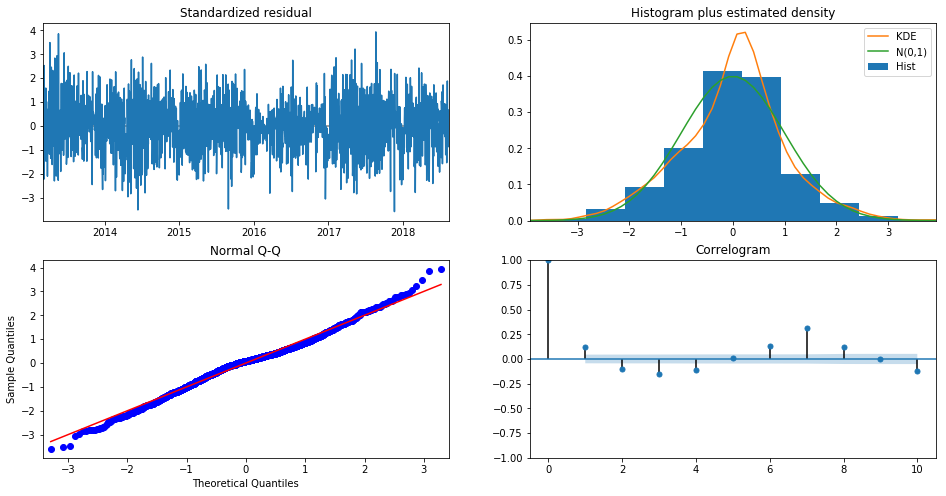

In [11]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

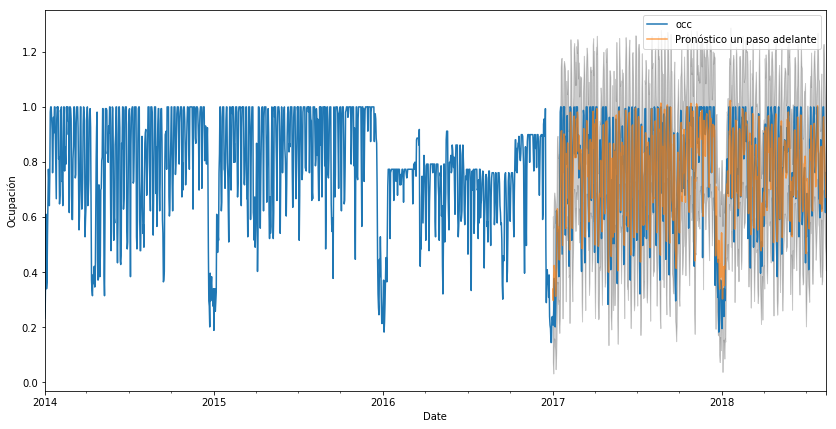

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Pronóstico un paso adelante', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Ocupación')
plt.legend()
plt.savefig('Figures/ARIMA_pred.png')
plt.show()

In [13]:
real=y['2017':]
MAPE = (sum(abs((real['occ']-pred.predicted_mean))/real['occ'])/len(real['occ']))*100
print(MAPE)

18.1597180301


In [14]:
y_forecasted = pd.DataFrame(pred.predicted_mean,columns=['occ'])
y_truth = y['2017-01-01':]
mse = ((y_forecasted[['occ']]-y_truth[['occ']])**2).mean()
#mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is occ    0.02
dtype: float64


In [15]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is occ    0.15
dtype: float64


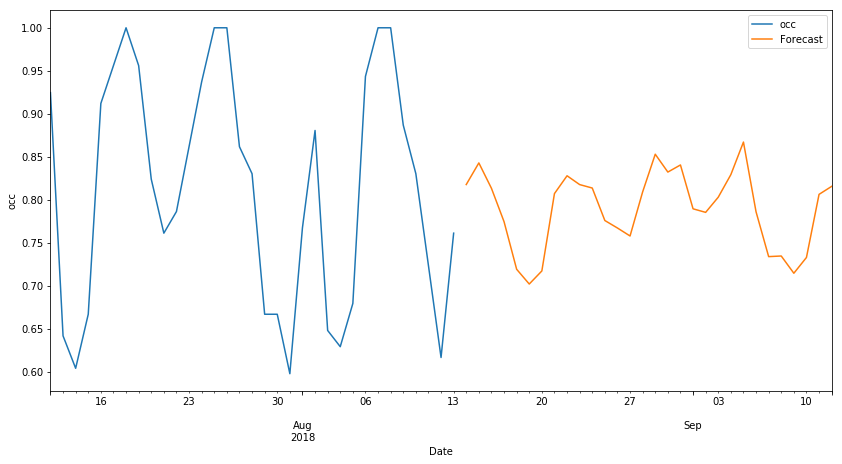

In [19]:
y2=y[2018:]
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('occ')
plt.legend()
plt.savefig('Figures/ArimaPred.png',dpi=100)
plt.show()

In [20]:
arima_pred = pred_uc.predicted_mean
arima_pred.to_csv('data/arima_pred.csv', sep=',')

In [21]:
pred.predicted_mean

2017-01-01    0.351808
2017-01-02    0.313162
2017-01-03    0.187086
2017-01-04    0.304450
2017-01-05    0.566501
2017-01-06    0.318441
2017-01-07    0.269068
2017-01-08    0.301507
2017-01-09    0.387479
2017-01-10    0.378732
2017-01-11    0.477362
2017-01-12    0.513567
2017-01-13    0.466668
2017-01-14    0.363114
2017-01-15    0.375014
2017-01-16    0.455569
2017-01-17    0.597675
2017-01-18    0.656969
2017-01-19    0.777132
2017-01-20    0.813100
2017-01-21    0.747803
2017-01-22    0.443735
2017-01-23    0.625655
2017-01-24    0.788975
2017-01-25    0.741354
2017-01-26    0.741672
2017-01-27    0.854139
2017-01-28    0.870228
2017-01-29    0.684414
2017-01-30    0.806214
                ...   
2018-07-15    0.725343
2018-07-16    0.576491
2018-07-17    0.773920
2018-07-18    0.818176
2018-07-19    0.792523
2018-07-20    1.033165
2018-07-21    0.906180
2018-07-22    0.796282
2018-07-23    0.785771
2018-07-24    0.755565
2018-07-25    0.750012
2018-07-26    0.846990
2018-07-27 